In [50]:
!pip install kaggle


In [128]:
!pip install scipy

In [52]:
!pip install ipympl

In [3]:
!pip install --upgrade ipympl matplotlib jupyterlab

In [4]:
!pip install ipywidgets

In [5]:

pip install --upgrade ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install notebook

In [178]:
import pandas as pd
import numpy as np
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets#for parameter control in plot
from ipywidgets import interactive
from scipy.stats import linregress
from IPython.display import display

In [180]:
widgets.IntSlider()

IntSlider(value=0)

In [182]:


# Full correct path to kaggle.json
source_path = r"C:\Users\user\Downloads\kaggle.json"

# Destination .kaggle directory
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Move the file
shutil.move(source_path, os.path.join(kaggle_dir, "kaggle.json"))

print("kaggle.json moved successfully!")



kaggle.json moved successfully!


In [184]:
!kaggle datasets list -s "COVID-19 Global Data Tracker" 


ref                                                         title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
aditeloo/the-world-dataset-of-covid19                       The World Dataset of COVID-19                       24211978  2021-05-25 17:26:09.570000           1681         35  1.0              
kamal007/global-covid19-vaccination-tracker                 Global COVID19 Vaccination Tracker                      9045  2021-09-11 19:30:36.317000           1154         35  1.0              
bitsnpieces/covid19-country-data                            COVID-19 Country Data                                 190821  2020-05-03 23:51:55.500000           1942         32  0.88235295       
mpwolke/cusersmarildownloadsdi

In [185]:
!kaggle datasets download -d "bitsnpieces/covid19-country-data"

Dataset URL: https://www.kaggle.com/datasets/bitsnpieces/covid19-country-data
License(s): DbCL-1.0
covid19-country-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [187]:
print(os.listdir())

[' Predicting ADHD in Women.ipynb', '-p', '.anaconda', '.bash_history', '.conda', '.condarc', '.continuum', '.git', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.viminfo', '.vscode', '2', '3D Objects', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'ass rem 1.ipynb', 'assign1.2.ipynb', 'assign2.ipynb', 'ASSIGNMENT', 'assignpython1.ipynb', 'assvisualization1.ipynb', 'bad model using linear regression.ipynb', 'bezdekIris.data', 'Box', 'clinic_booking_system.sql', 'CODES', 'Contacts', 'Cookies', 'Copy of dummy_data_1(1).xlsx', 'COVID-19 Global Data Tracker.ipynb', 'covid19-country-data', 'covid19-country-data.zip', 'Data Dictionary.xlsx', 'data visualization rem 3.ipynb', 'Data visualization rem3.ipynb', 'data_2.csv', 'Decision Tree Classification model.ipynb', 'Decision tree Model.ipynb', 'Desktop', 'df.xlsx', 'Documents', 'Downloads', 'eda_data.csv', 'Favorites', 'glassdoor_jobs.csv', 'house.csv', 'Index', 'india_job_market_dat

In [188]:
# Define the ZIP file path and extraction location
zip_file_path = "covid19-country-data.zip"
extract_to_path = "covid19-country-data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Dataset extracted to:", extract_to_path)



Dataset extracted to: covid19-country-data


In [189]:
print(os.listdir(extract_to_path))

['country_names_covid19_forecast.csv', 'covid19_data - 2009_flu_pandemic.csv', 'covid19_data - age.csv', 'covid19_data - airport_traffic.csv', 'covid19_data - airport_traffic_world.csv', 'covid19_data - cost_of_living.csv', 'covid19_data - covid19_strains.csv', 'covid19_data - covid_tests.csv', 'covid19_data - data_sources.csv', 'covid19_data - flu_pneumonia_death.csv', 'covid19_data - gdp.csv', 'covid19_data - health.csv', 'covid19_data - hospital_beds.csv', 'covid19_data - lat_long.csv', 'covid19_data - population.csv', 'covid19_data - property_prices.csv', 'covid19_data - quality_of_life.csv', 'covid19_data - school_closures.csv', 'covid19_data - sex.csv', 'covid19_merged.csv', 'dhl_people_breadth.csv']


In [194]:
import pandas as pd
# Adjust file name based on what’s extracted
df = pd.read_csv("covid19-country-data/covid19_data - cost_of_living.csv")

# Preview
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,2,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,3,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,4,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,5,Denmark,83.00,31.92,58.57,61.74,100.75,100.88


In [196]:
df.describe

<bound method NDFrame.describe of      Rank      Country  Cost of Living Index  Rent Index  \
0       1  Switzerland                122.40       50.25   
1       2       Norway                101.43       36.15   
2       3      Iceland                100.48       46.95   
3       4        Japan                 83.35       25.97   
4       5      Denmark                 83.00       31.92   
..    ...          ...                   ...         ...   
127   128   Uzbekistan                 26.01        7.54   
128   129        Syria                 25.31        5.68   
129   130        India                 24.58        5.68   
130   131  Afghanistan                 24.24        4.03   
131   132     Pakistan                 21.98        4.59   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             87.89           120.27                  123.01   
1                             70.21            91.14                  109.28   
2    

In [198]:
df.duplicated().sum()

0

In [200]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

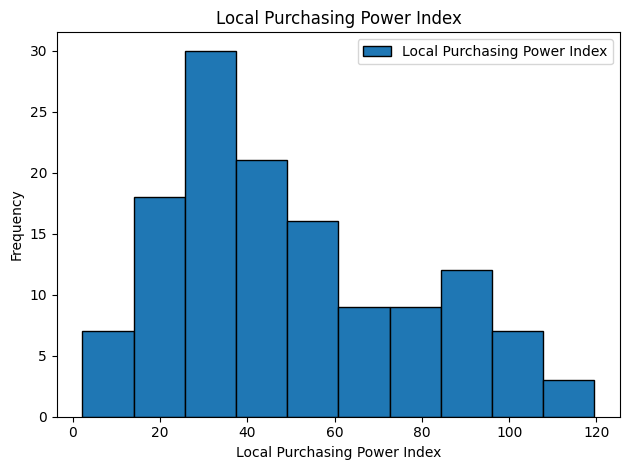

In [202]:
#histogram 
df['Local Purchasing Power Index'].plot(kind='hist', bins=10,edgecolor="black")
plt.xlabel('Local Purchasing Power Index')
plt.title('Local Purchasing Power Index')
plt.tight_layout()
plt.legend()
plt.show()

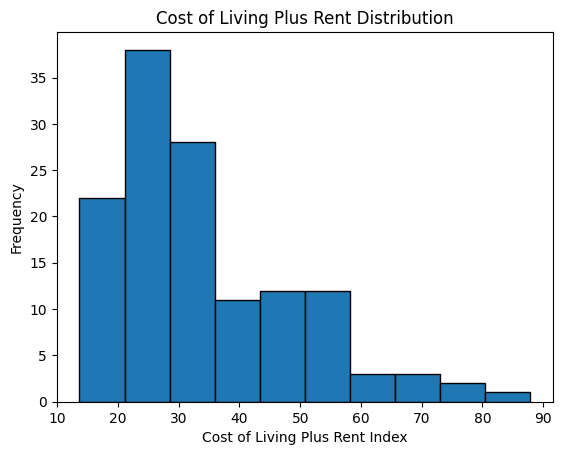

In [204]:
df['Cost of Living Plus Rent Index'].plot(kind='hist', bins=10,edgecolor="black")
plt.xlabel('Cost of Living Plus Rent Index')
plt.title('Cost of Living Plus Rent Distribution')
plt.show()

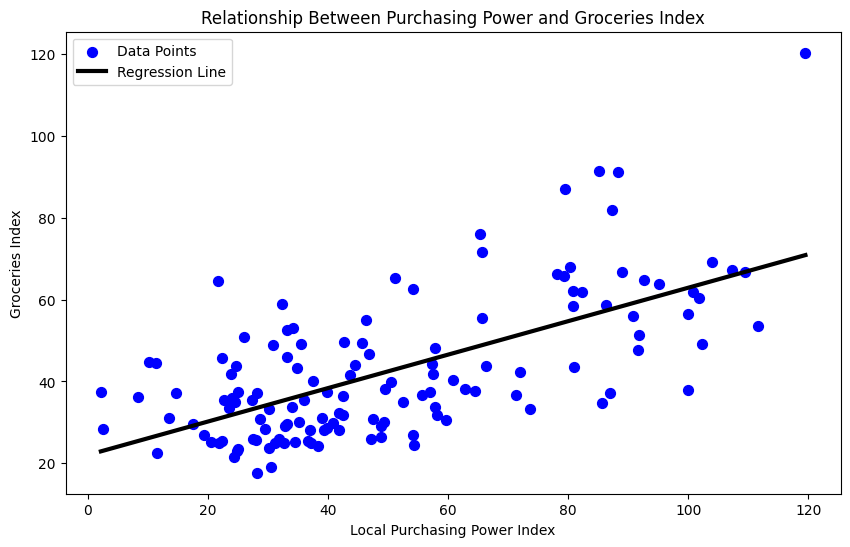

In [206]:
#scatter plot --> used for seening different trends and outliers


def slope_viz():
    # Calculate regression parameters
    slope, intercept, _, _, _ = linregress(
        df["Local Purchasing Power Index"], 
        df["Groceries Index"]
    )
    
    plt.figure(figsize=(10, 6))
    
    # Scatter plot
    plt.scatter(
        df["Local Purchasing Power Index"], 
        df["Groceries Index"], 
        s=50, 
        color='blue', 
        label='Data Points'
    )
    
    # Regression line
    x_min = df["Local Purchasing Power Index"].min()
    x_max = df["Local Purchasing Power Index"].max()
    x_values = np.linspace(x_min, x_max, 100)
    y_values = slope * x_values + intercept
    
    plt.plot(x_values, y_values, lw=3, color='black', label='Regression Line')
    
    # Labels and title
    plt.xlabel("Local Purchasing Power Index")
    plt.ylabel("Groceries Index")
    plt.title("Relationship Between Purchasing Power and Groceries Index")
    plt.legend()
    plt.show()

# Call the function
slope_viz()

In [208]:
def interactive_plot(slope):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot
    plt.scatter(
        df["Cost of Living Index"], 
        df["Rent Index"], 
        s=50, 
        color='blue', 
        label='Data Points'
    )
    
    # Regression line (calculated from data)
    calc_slope, intercept, r_value, _, _ = linregress(
        df["Cost of Living Index"], 
        df["Rent Index"]
    )
    x_values = np.linspace(df["Cost of Living Index"].min(), df["Cost of Living Index"].max(), 100)
    
    # Plot calculated regression line
    plt.plot(x_values, calc_slope * x_values + intercept, lw=2, color='red', linestyle='--', label='Calculated Regression')
    
    # Plot manual regression line (controlled by slider)
    plt.plot(x_values, slope * x_values, lw=3, color='black', label='Manual Slope')
    
    # Labels and legend
    plt.xlabel("Cost of Living Index")
    plt.ylabel("Rent Index")
    plt.title("Interactive Regression Line")
    plt.legend()
    plt.show()
    print(f"Calculated Slope: {calc_slope:.2f} | R-squared: {r_value**2:.2f}")

# Add a slider for slope adjustment
slope_slider = widgets.FloatSlider(
    value=0,  # Initial value
    min=-5,   # Minimum slope
    max=5,    # Maximum slope
    step=0.1, # Step size
    description='Slope:'
)

# Display the interactive widget
widgets.interact(interactive_plot, slope=slope_slider)

interactive(children=(FloatSlider(value=0.0, description='Slope:', max=5.0, min=-5.0), Output()), _dom_classes…

<function __main__.interactive_plot(slope)>

In [210]:
def lifestyle_widget(bw=1):
    sns.kdeplot(df["Groceries Index"],lw=2,fill=True,bw_adjust=bw)
    plt.xlim(-30,300)
    plt.ylim(0,0.03);

In [212]:
widgets.interact(lifestyle_widget,bw=(.1,3));

interactive(children=(FloatSlider(value=1.0, description='bw', max=3.0, min=0.1), Output()), _dom_classes=('wi…

C:\Users\user\COVID-19 Global Data Tracker.ipynb
